# PYTHON 13. Визуализация данных

In [2]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Датасет №1 и №2:

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


- *date* — дата наблюдения;
- *province/state* — наименование провинции/штата;
- *country* — наименование страны;
- *confirmed* — общее число зафиксированных случаев на указанный день;
- *deaths* — общее число зафиксированных смертей на указанный день;
- *recovered* — общее число выздоровлений на указанный день.

- *country* — наименование страны;
- *date* — дата наблюдения;
- *total_vaccinations* — общее число введённых вакцин в стране на указанный день;
- *people_vaccinated* — общее число привитых первым компонентом в стране на указанный день;
- *people_vaccinated_per_hundred* — процент привитых первым компонентом в стране на указанный день (рассчитывается как people_vaccinated/population*100);
- *people_fully_vaccinated* — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
- *people_fully_vaccinated_per_hundred* — процент привитых вторым компонентом в стране на указанный день (рассчитывается как people_fully-vaccinated/population*100);
- *daily_vaccination* — ежедневная вакцинация (число вакцинированных в указанный день);
- *vaccines* — комбинации вакцин, используемые в стране.

In [4]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - \
    covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
#3.1
display(covid_data.sort_values(by='date')) #2020-01-22-2021-05-29
#3.2
display(vaccinations_data.sort_values(by='date'))
#3.3
covid_df = covid_data.merge(vaccinations_data, \
    on=['date', 'country'], how='left')
display(covid_df)
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
display(covid_df['death_rate'].value_counts(), covid_df['recover_rate'].value_counts())
#3.4
display('Максимальный процент смертности в США за весь период:', \
    round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)) #7.19
#3.5
display('Средний процент выздоровлений в России за весь период:', \
    round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)) #67.06

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
4056,2020-01-22,Japan,2.0,0.0,0.0,2.0,NaN,NaN,NaN
4055,2020-01-22,Hong Kong,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4054,2020-01-22,China,547.0,17.0,28.0,502.0,NaN,NaN,NaN
4061,2020-01-22,Thailand,4.0,0.0,2.0,2.0,NaN,NaN,NaN
4060,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45506,2021-05-29,Serbia,712046.0,6844.0,0.0,705202.0,274.0,10.0,0.0
45490,2021-05-29,Peru,1947555.0,68978.0,1897522.0,-18945.0,5501.0,162.0,4728.0
45433,2021-05-29,Iran,2893218.0,79741.0,2425033.0,388444.0,7107.0,173.0,14781.0
45523,2021-05-29,Syria,24440.0,1763.0,21593.0,1084.0,30.0,5.0,5.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


death_rate
0.000000     10295
22.222222      426
1.825843       410
4.125737       387
0.676285       140
             ...  
3.016123         1
3.014009         1
3.007991         1
3.008095         1
4.094213         1
Name: count, Length: 58948, dtype: int64

recover_rate
0.000000      4501
100.000000    1913
35.952849      387
77.777778      239
55.555556      224
              ... 
23.417875        1
31.578947        1
25.531915        1
22.077922        1
93.951147        1
Name: count, Length: 63161, dtype: int64

'Максимальный процент смертности в США за весь период:'

7.19

'Средний процент выздоровлений в России за весь период:'

67.06

## 4. Графические возможности библиотеки Pandas

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

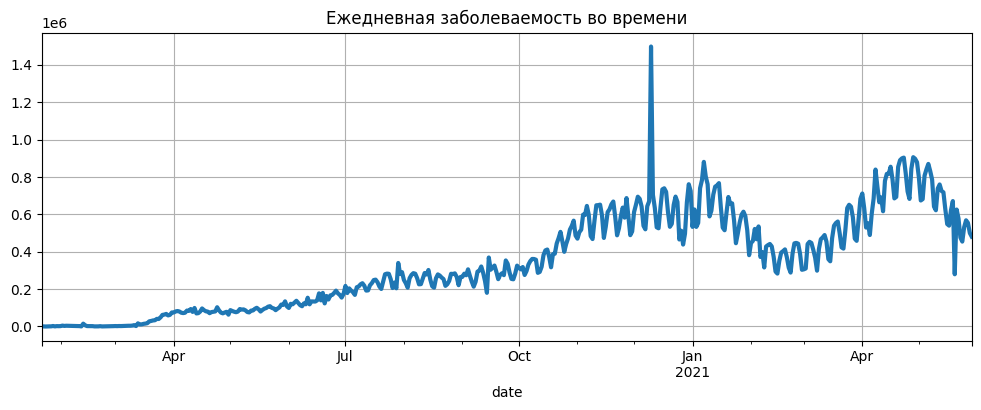

In [5]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

<Axes: title={'center': 'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

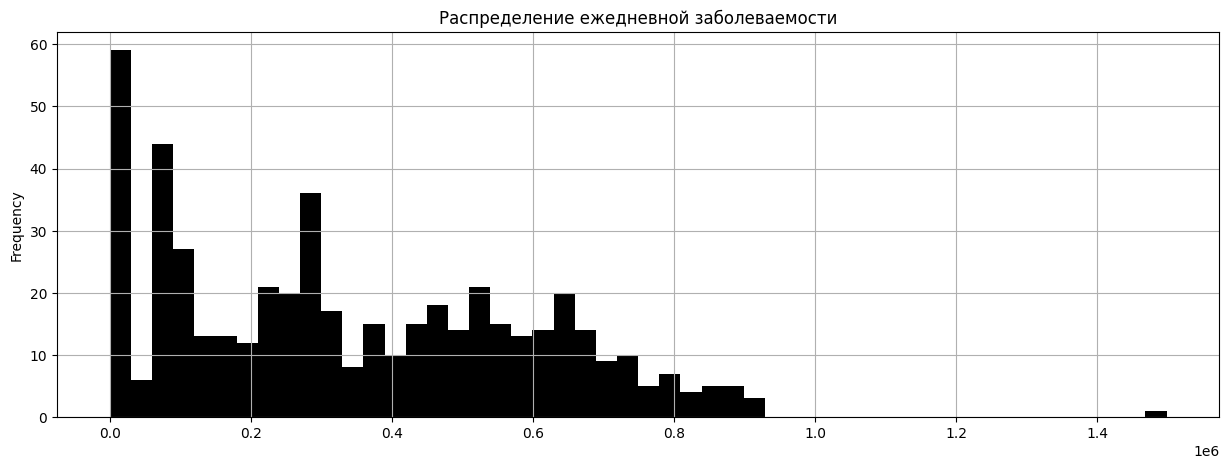

In [6]:
grouped_cases.plot(
    kind='hist',
    figsize=(15, 5),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=50
)

<Axes: title={'center': 'ТОП-10 стран по заболеваемости'}, xlabel='country'>

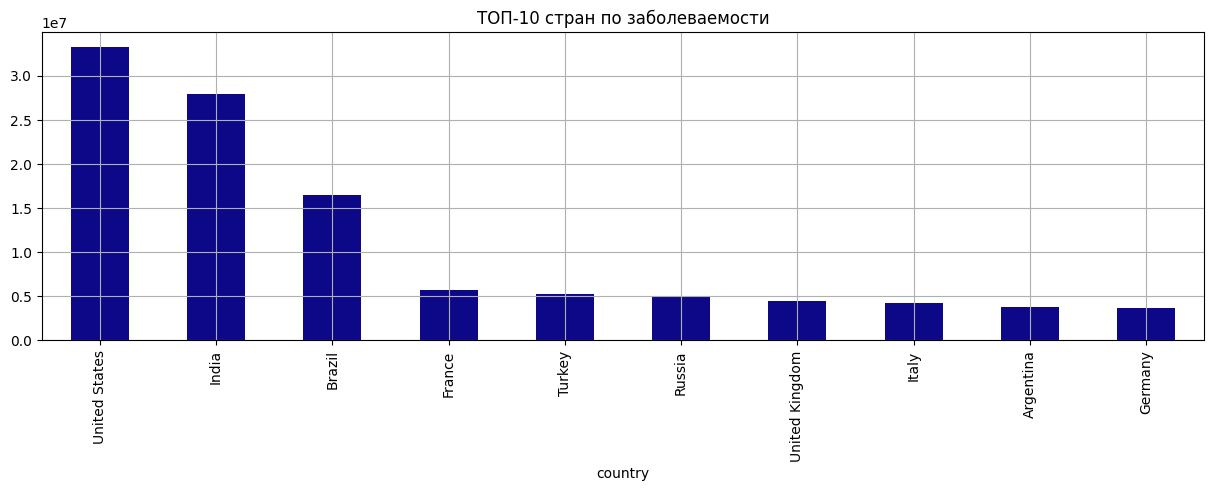

In [7]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(15, 4),
    title='ТОП-10 стран по заболеваемости',
    colormap='plasma'
)

<Axes: title={'center': 'Заболеваемость и смертность'}, xlabel='country'>

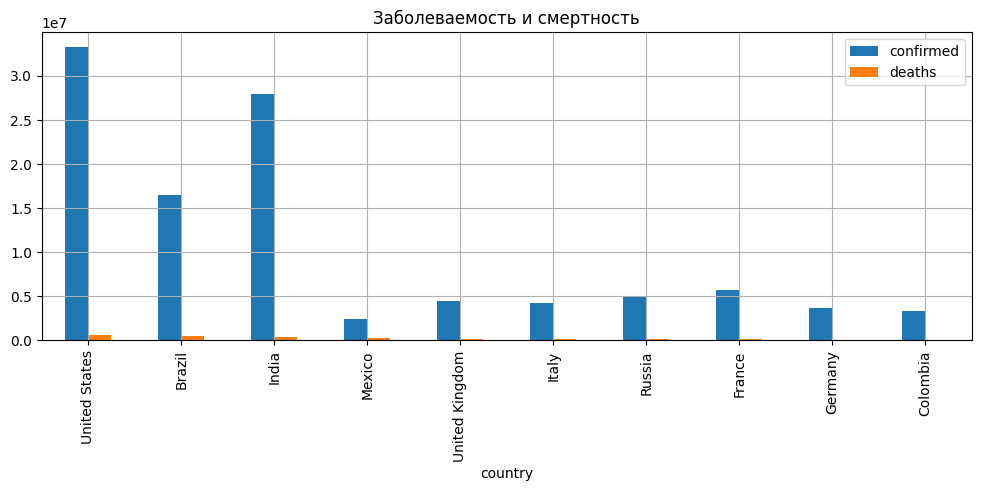

In [8]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(kind='bar', grid=True, figsize=(12, 4), title='Заболеваемость и смертность')

<Axes: xlabel='country'>

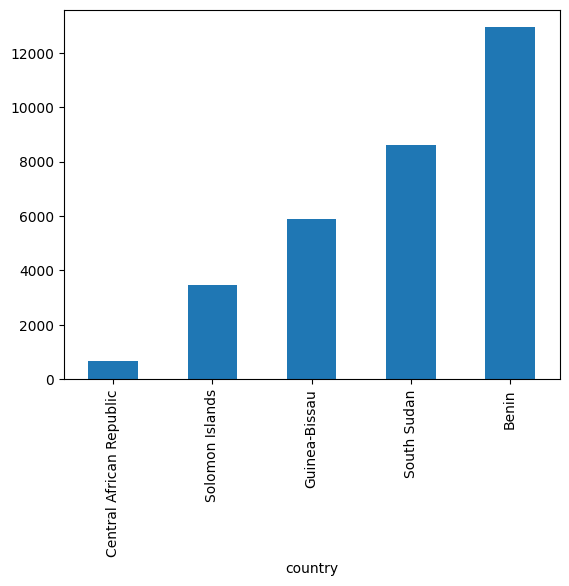

In [9]:
#Задание 4.5

display(covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar'));

## 5. Графические возможности библиотеки Matplotlib

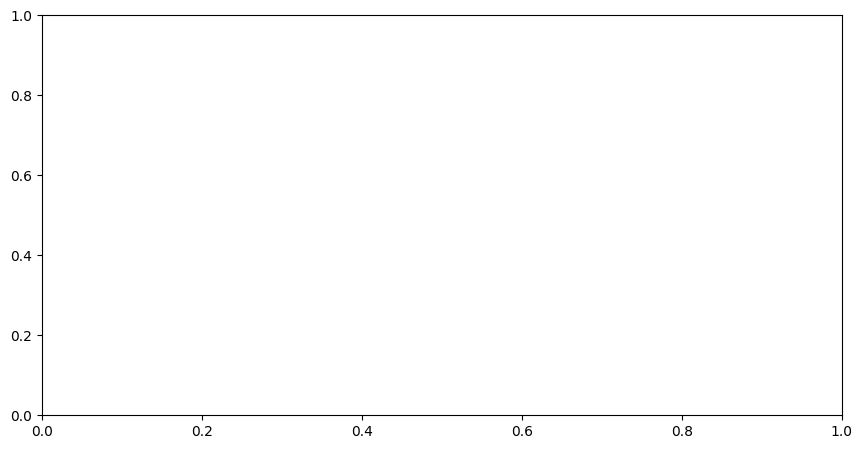

In [10]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

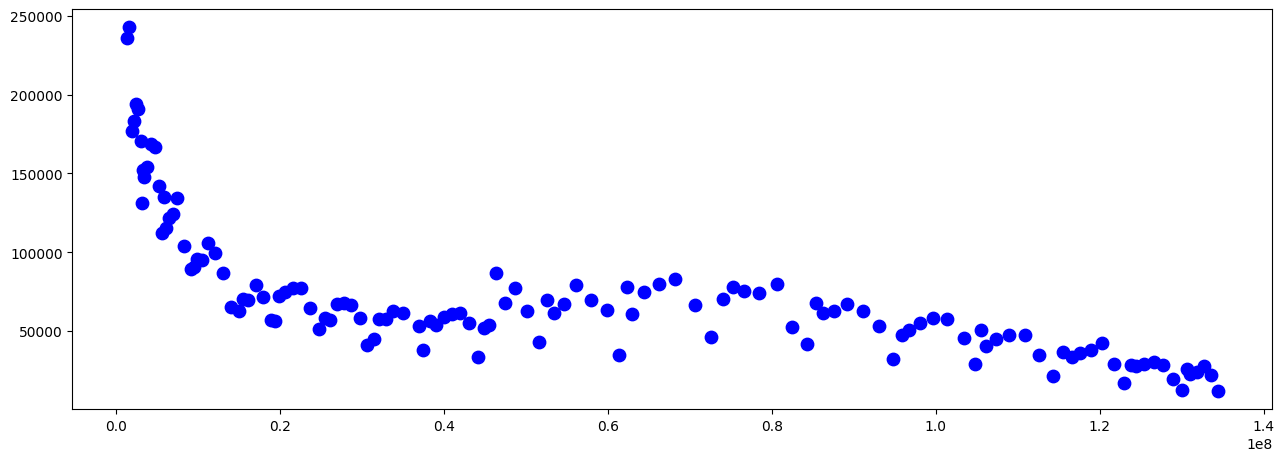

In [11]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=80,
    marker='o',
    c = 'blue'
);

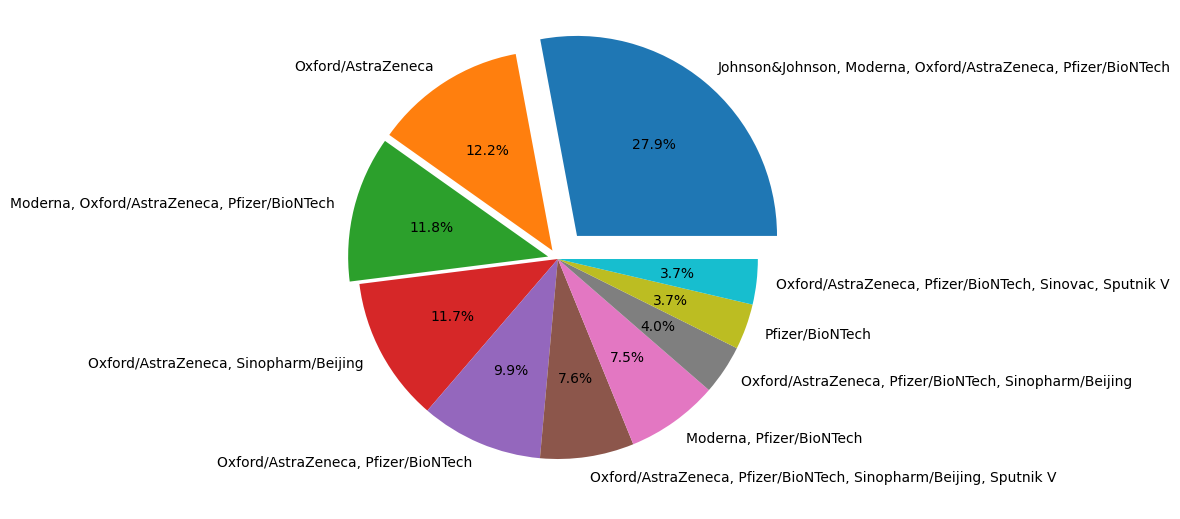

In [12]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.15, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]
);

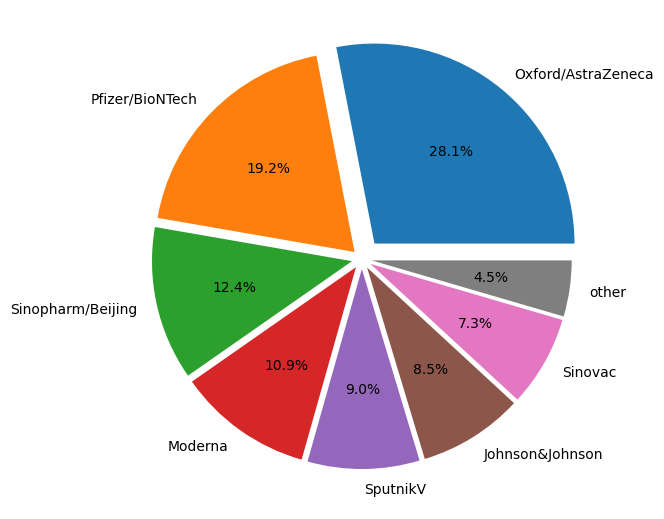

In [13]:
#Код для такой же диаграммы, но вакцинам отдельно:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode = [0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
);

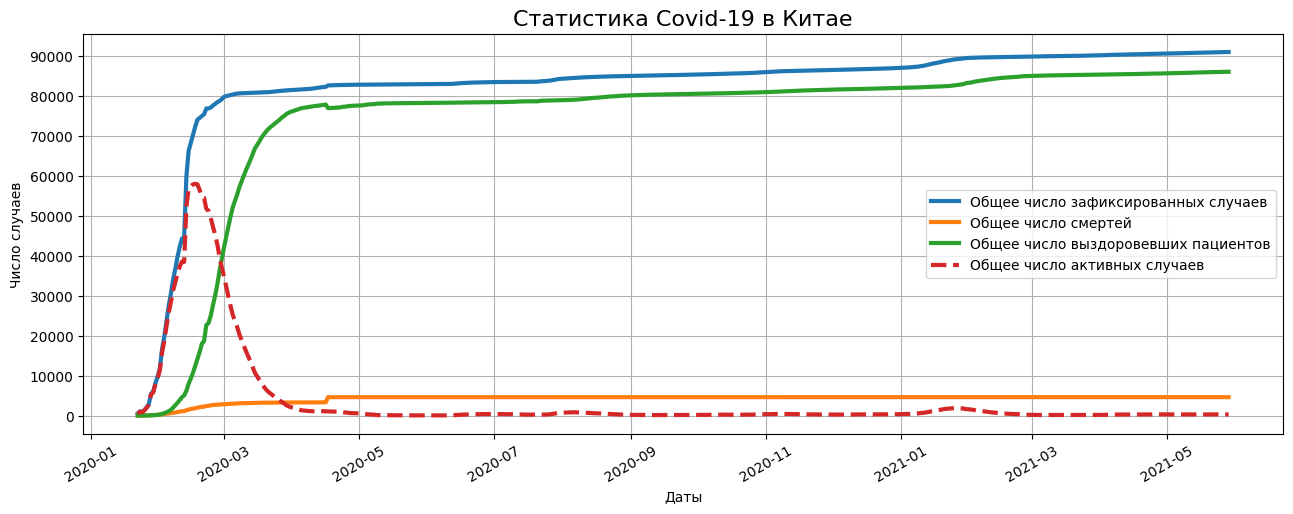

In [14]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

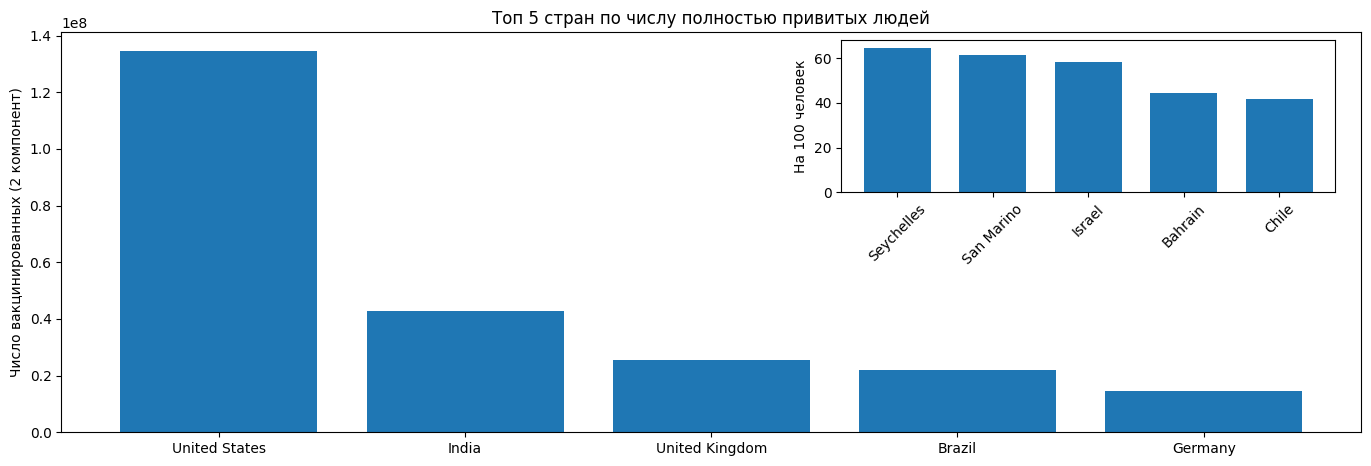

In [15]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.7);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

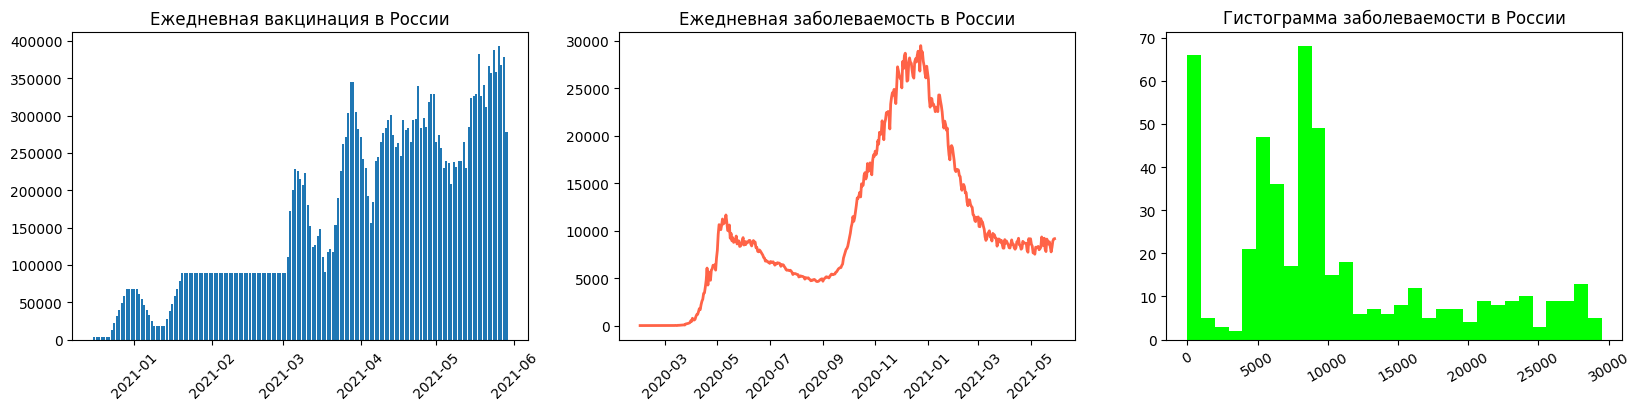

In [16]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=30
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

## 6. Графические возможности библиотеки Seaborn

In [17]:
print(sns.__version__)

0.13.0


In [18]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


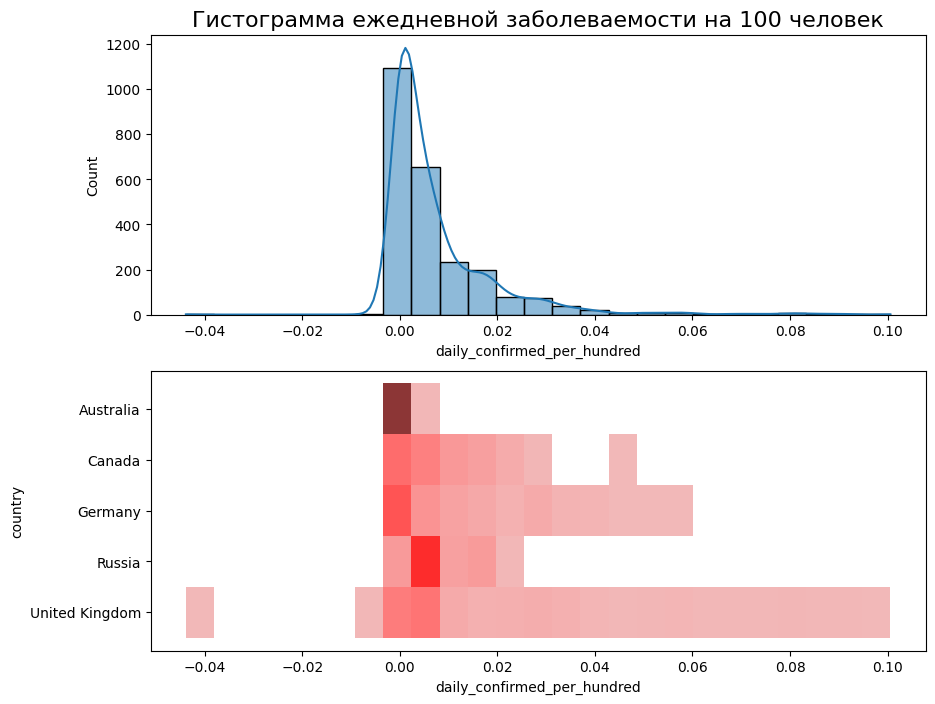

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

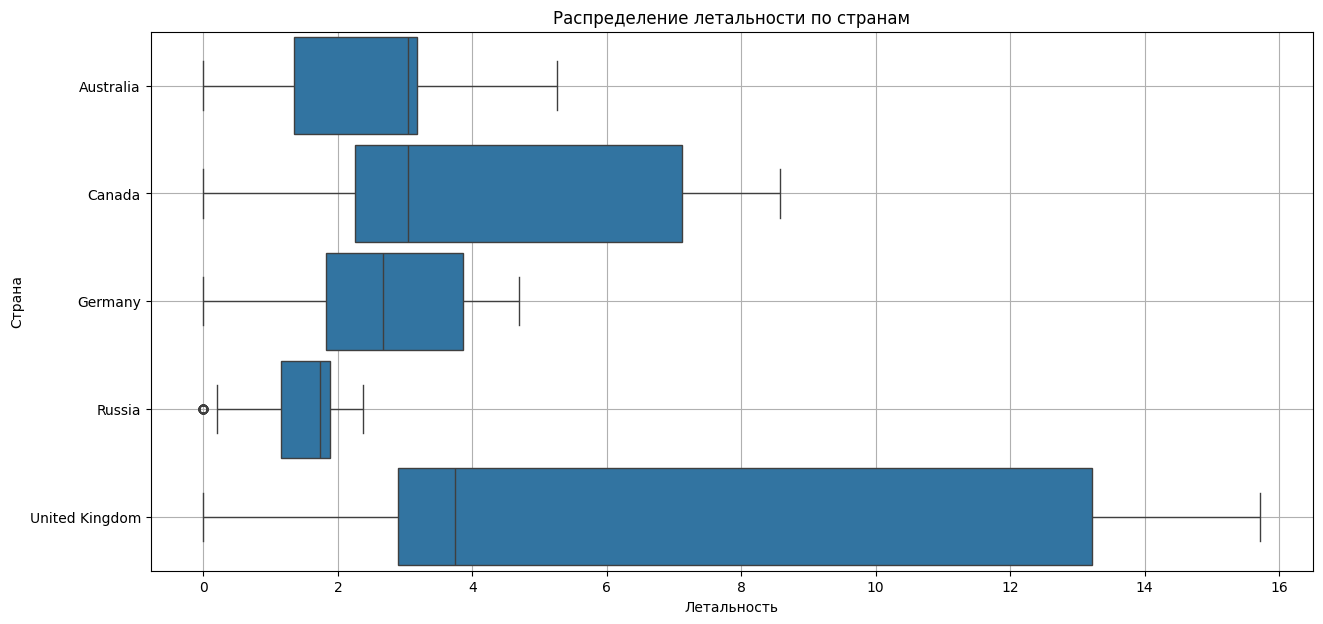

In [23]:
fig = plt.figure(figsize=(15, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

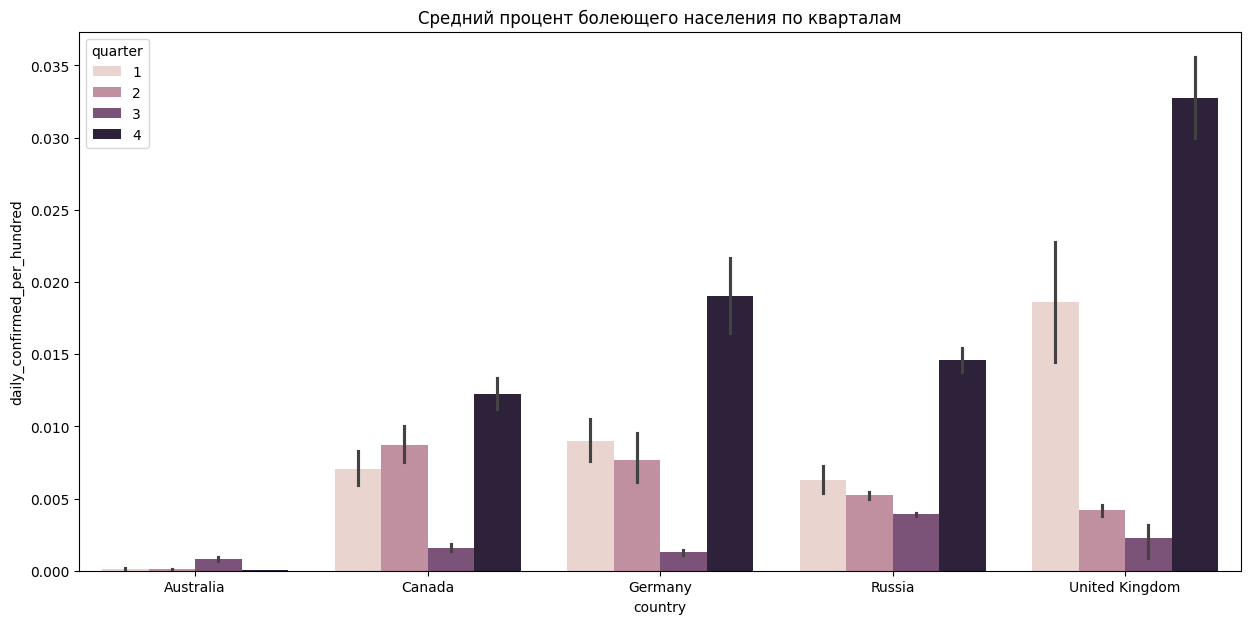

In [22]:
fig = plt.figure(figsize=(15, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

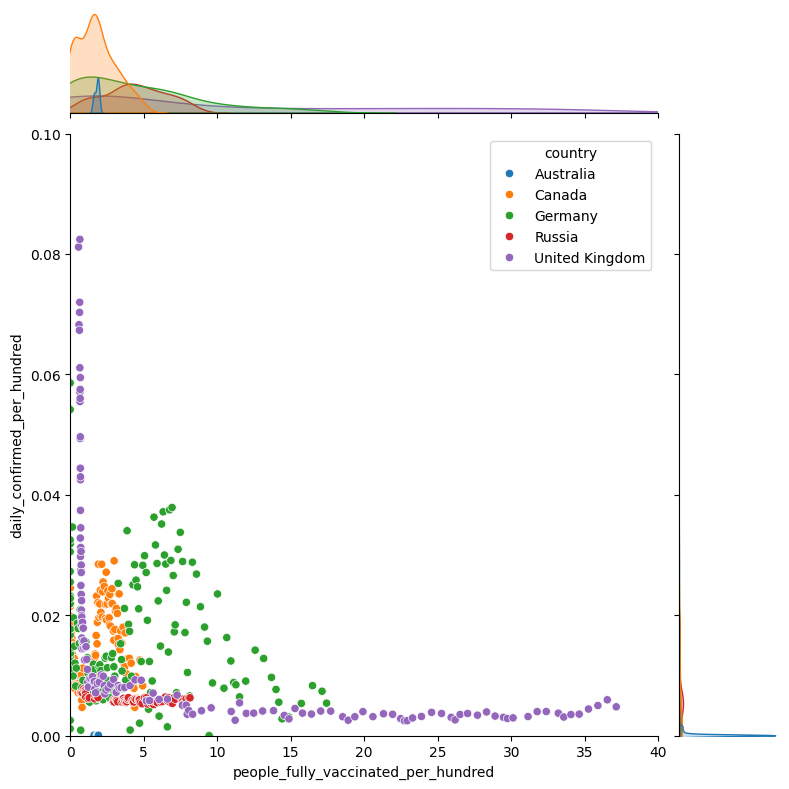

In [25]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
);

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


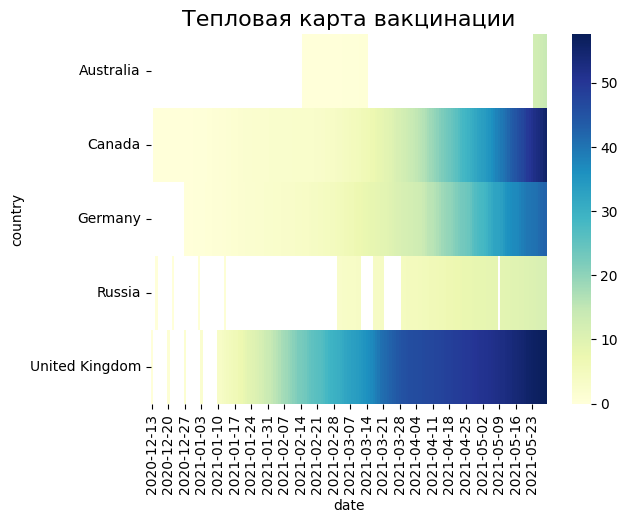

In [26]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


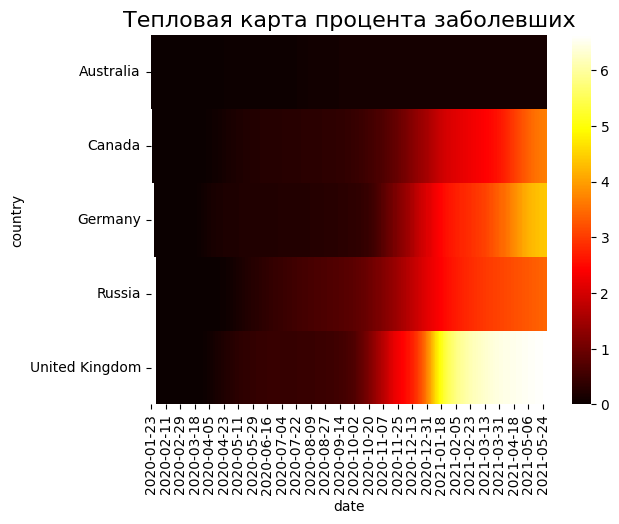

In [32]:
# задание 6.4

croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed'] / \
    croped_covid_df['population']) * 100
pivot_confirmed_per_hundred = croped_covid_df.pivot_table(
    values= 'confirmed_per_hundred',
    columns= 'date',
    index= 'country'
)
pivot_confirmed_per_hundred.columns = pivot_confirmed_per_hundred.columns.astype('string')
display(pivot_confirmed_per_hundred)
heatmap_confirmed_per_hundred = sns.heatmap(data=pivot_confirmed_per_hundred, cmap='hot')
heatmap_confirmed_per_hundred.set_title('Тепловая карта процента заболевших', fontsize=16);

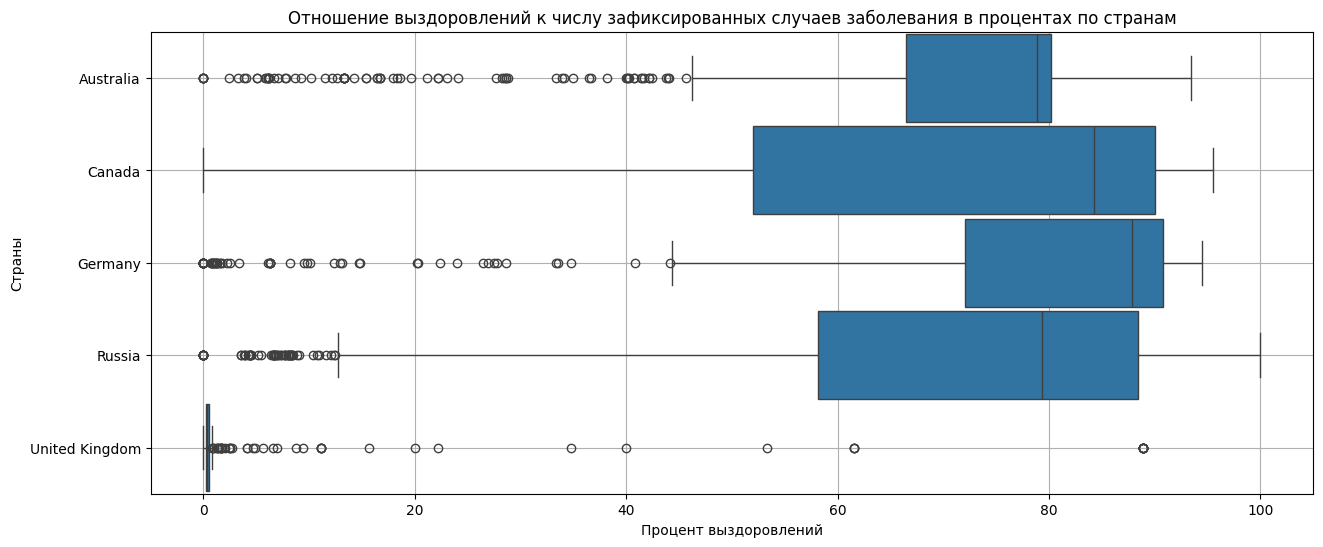

In [37]:
# задание 6.5

fig = plt.figure(figsize=(15, 6))
boxplot_recovery_rate = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.95
)

boxplot_recovery_rate.set_title('Отношение выздоровлений к числу зафиксированных случаев заболевания в процентах по странам')
boxplot_recovery_rate.set_ylabel('Страны')
boxplot_recovery_rate.set_xlabel('Процент выздоровлений')
boxplot_recovery_rate.grid()